In [1]:
#importing the libraries to get the plots 
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px


In [2]:
#style parameters to design our plots accordingly 
sns.set_style('whitegrid') #we have set the grid background to be plain white 
plt.rcParams['font.size']=18 #font to be used in the grid  
plt.rcParams['figure.figsize']=(15,8) #length and height of the grid 
plt.rcParams['figure.facecolor']='#ffffff'#color below the grid; this code is of burlywood1 color 

In [3]:
#reading and loading the dataset in the jupyter notebook 
data_set= pd.read_csv("C:/Users/siddg/OneDrive/Desktop/EM 623 Final Project/world-happiness-report-2021.csv")

In [4]:
data_set_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
data_set = data_set[data_set_columns].copy()
df_happy1 = data_set.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_percapita','Social support':'social_support','Healthy life expectancy':'health_life','Freedom to make life choices':'freedom_lifechoices','Generosity':'generosity','Perceptions of corruption':'perception_corruption'}, axis=1)
df_happy1.head()

,country_name,regional_indicator,happiness_score,logged_percapita,social_support,health_life,freedom_lifechoices,generosity,perception_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [5]:
#Viewing the changes to the dataset made 
df_happy1.head()
#type(data_set)
df_happy1.isnull().sum() #checking whether any column has null or blank; if Boolean False appears in table which infers no null values in any column 

country_name             0
regional_indicator       0
happiness_score          0
logged_percapita         0
social_support           0
health_life              0
freedom_lifechoices      0
generosity               0
perception_corruption    0
dtype: int64

Text(0, 0.5, '')

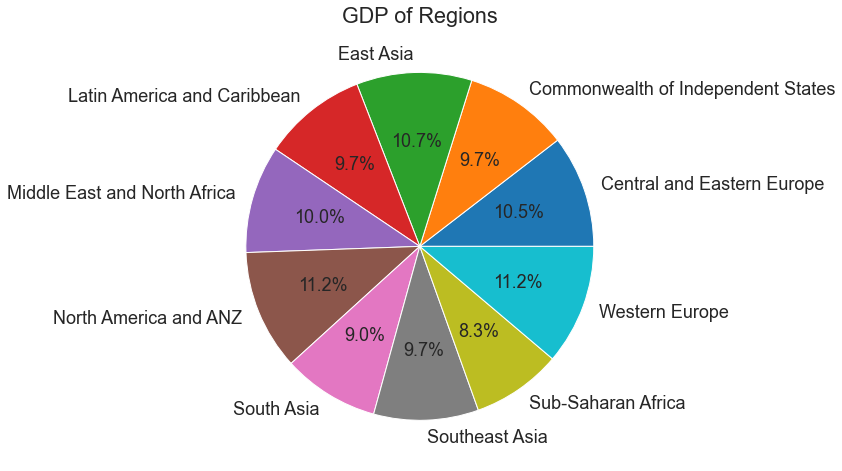

In [6]:
#Plot between regions and GDP by percentage ; contribution to World Economy 
GDP_column= df_happy1.groupby('regional_indicator')['logged_percapita'].mean()
GDP_column 
GDP_column.plot.pie(autopct= '%1.1f%%')
plt.title("GDP of Regions")
plt.ylabel('')

In [7]:
#total countries
total_countries = df_happy1.groupby("regional_indicator")[("country_name")].count()
print(total_countries)s

SyntaxError: invalid syntax (Temp/ipykernel_1612/3801584337.py, line 3)

In [ ]:
# Creating a new DataFrame with the mean happiness score  and GDP per capita by region
df_grouped = df_happy1.groupby("regional_indicator")[[ "social_support"]].mean().reset_index()

# Creating the donut chart
fig = go.Figure(data=go.Pie(
    labels=df_grouped["regional_indicator"],
    values=df_grouped["social_support"],
    hole=0.4,
    textinfo="label+percent",
    textposition="inside",
    marker=dict(colors=px.colors.qualitative.Pastel)
))

# layout modulation
fig.update_layout(
    title="Social support in Various Regions",
    annotations=[dict(text=" ", x=0.5, y=0.5, font_size=25, showarrow=False)]
)

fig.show()

In [ ]:
#Total countries
total_country=df_happy1.groupby('regional_indicator')[['country_name']].count()
#print(total_country)
cor= df_happy1.corr(method='pearson')
f, ax = plt.subplots(figsize =(10,5))
sns.heatmap(cor, mask= np.zeros_like(cor , dtype= np.bool),
            cmap= 'Blues', square= True ,ax=ax)

In [ ]:
#corruption in regions
corruption= df_happy1.groupby('regional_indicator')[['perception_corruption']].mean()
#corruption
plt.rcParams['figure.figsize']=(12,8)
plt.title('Perception of Corruption in various Regions ')
plt.xlabel('Regions', fontsize= 15)
plt.ylabel('Corruption Index', fontsize=15)
plt.xticks(rotation =30,ha='right')
plt.bar(corruption.index, corruption.perception_corruption)

In [ ]:
top_10=df_happy1.head(10)
bottom_10=df_happy1.tail(10)

fig,axes = plt.subplots(1,2, figsize =(16,6))
plt.tight_layout(pad= 2)
xlabels= top_10.country_name
axes[0].set_title('Top 10 happiest countries life Expenctancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country_name,y= top_10.health_life, ax=axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 happiest countries life Expenctancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country_name,y= bottom_10.health_life, ax=axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')
fig.set_facecolor('#e5e5e5')

In [ ]:
#Corelation between Freedom to make life choices and Happiness
plt.rcParams['figure.figsize']= (15,7)
sns.scatterplot(x=df_happy1.freedom_lifechoices,y=df_happy1.happiness_score, hue=df_happy1.regional_indicator, s=200)
plt.legend(loc='upper left', fontsize='12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

In [ ]:
# Filter the data for the countries with the top 10 highest perception of corruption scores
top_10 = df_happy1.sort_values("perception_corruption", ascending=False).head(10)

# Set the style of the plot
sns.set_style("whitegrid")

# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal bar chart using Seaborn
sns.barplot(data=top_10, y="country_name", x="perception_corruption", palette="crest_r", ax=ax)

# Set the title and axis labels
ax.set_title("Perception of Corruption Scores for Top 10 Countries", fontsize=16)
ax.set_xlabel("Perception of Corruption Score", fontsize=14)
ax.set_ylabel("Country", fontsize=14)

# Set the ticks and tick labels
ax.tick_params(axis='both', labelsize=12)

# Display the plot
plt.show()

In [ ]:
#corruption vs happiness
plt.rcParams['figure.figsize']= (15,7)
plt.title('Plot between Happiness and Corruption')
sns.scatterplot(x=df_happy1.happiness_score,y = df_happy1.perception_corruption ,hue= df_happy1.regional_indicator, s= 200);

plt.legend(loc= 'lower left', fontsize ='14')
plt.xlabel('Corruption')
plt.ylabel('Happiness Score')

In [ ]:
# selecting the features and target variable
features = ['logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']
target = 'happiness_score'

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_happy1[features], df_happy1[target], test_size=0.2, random_state=42)

# training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predicting the happiness score for 2022 of each country
data_set_2022 = pd.read_csv("world-happiness-report-2021.csv", usecols=['Country name', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])
data_set_2022.columns = ['country_name', 'logged_percapita', 'social_support', 'health_life', 'freedom_lifechoices', 'generosity', 'perception_corruption']
X_2022 = data_set_2022[features]
y_2022_pred = model.predict(X_2022)

# adding the predicted happiness score for 2022 to the dataset
data_set_2022['Happiness score 2022'] = y_2022_pred

# print the predicted happiness scores for 2022
print(y_2022_pred)

import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix
corr = df_happy1.corr()

# plot the heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

# display the plot
plt.show()



In [ ]:
# Decision Tree

# Importing required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the World Happiness Report 2021 dataset
data = pd.read_csv("world-happiness-report-2021.csv")

# Select features and target variable
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Ladder score'] > 5.5 # True if ladder score is greater than 5.5, False otherwise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Visualize the Decision Tree
fig, ax = plt.subplots(figsize=(12, 8))
plot_tree(clf, filled=True, ax=ax, feature_names=X.columns, class_names=['Low Score', 'High Score'])
plt.show()

In [ ]:
# Random Forest

# Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the World Happiness Report 2021 dataset
data = pd.read_csv("world-happiness-report-2021.csv")

# Select features and target variable
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Ladder score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Random Forest Regressor object
clf = RandomForestRegressor()

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how well does the regressor predict the target variable?
print("R2 score:", metrics.r2_score(y_test, y_pred))

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the World Happiness Report 2021 dataset
data = pd.read_csv("world-happiness-report-2021.csv")

# Select features and target variable
X = data[['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Ladder score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a KNN Regressor object
clf = KNeighborsRegressor(n_neighbors=5)

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = clf.predict(X_test)

# Model Accuracy, how well does the regressor predict the target variable?
print("R2 score:", metrics.r2_score(y_test, y_pred))